# Zuber

Una nueva empresa de viajes compartidos que se está lanzando en Chicago

Este analisis se basa principalmente en encontrar patrones en la información disponible y comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes. Tambien se analizaran los datos de los competidores.

Finalmente se probara una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

## Analisis de viajes en taxis

In [1]:
#Importar librerias

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from math import factorial
from matplotlib import pyplot as plt 
sns.set_theme()

In [2]:
#Leer datos
trips = pd.read_csv('/datasets/project_sql_result_01.csv')
loc= pd.read_csv('/datasets/project_sql_result_04.csv')
wt= pd.read_csv('/datasets/project_sql_result_07.csv')

### Exploracion inicial de datos

In [3]:
trips

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [4]:
trips.info() #observo la informacion general de la data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
trips.describe() #observo los datos mas relevantes de la columna numerica del DF trips

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:

print('Cantidad de filas duplicadas = ', trips.duplicated().sum())

Cantidad de filas duplicadas =  0


Trips es un dataframe con 64 filas y 2 columnas, de las culaes una es de tipo object y otra es de tipo integer. No se encuentran datos duplicados ni nulos. 

Principalmente se observa el nombre de la empresa de taxi y la cantidad de viajes que ha realizado. 
El maximo de viajes que ha realizado una empresa es 19558, el minimo de viajes ha sido solo 2 viajes y en promedio se realizan 2145 viajes en taxis.

In [7]:
loc

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [8]:
loc.info() #Observo las datos mas relevantes del DF loc 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
loc.describe() #observo los datos mas relevantes de la columna numerica del DF loc

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [10]:
print('Cantidad de filas duplicadas = ', loc.duplicated().sum())

Cantidad de filas duplicadas =  0


Este dataframe contiene 94 filas y 2 columnas, ninguna nula ni duplicada. una columna es de tipo object que describe el nombre de una ubicacion y la otra columna es de tipo float ya que es un promedio de viajes en aquella ubicacion.


El promedio minimo de viajes es de 1.8 y el maximo es 10727 viajes 

### Graficas

In [11]:
#Convertir las columnas de tipo de dato object en minusculas 
trips['company_name']=trips['company_name'].str.lower()
loc['dropoff_location_name']=loc['dropoff_location_name'].str.lower()

<AxesSubplot:title={'center':'Top 10 de compañias de taxi con mas viajes'}, xlabel='Compañias', ylabel='Q viajes'>

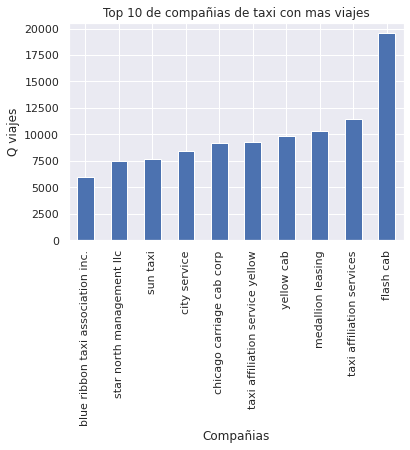

In [12]:
#Agrupar por compañia sumando los numeros de viajes por cada una de ellas
n_trips=trips.groupby('company_name')['trips_amount'].sum().sort_values()
top_trips=n_trips.tail(10) #Extraer solo las 10 compañias con mas viajes y realizar un grafico de barras 
top_trips.plot(kind='bar', x='company_name', xlabel='Compañias',ylabel='Q viajes', title='Top 10 de compañias de taxi con mas viajes') 

#### Conclusión compañia de taxis
Para los dias 15 y 16 de noviembre la empresa que hizo mas viajes fue 'Flash cab' con 20.000 viajes aproximadamente y sobresale casi por 8000 viajes a sus competidores

In [13]:
#Agrupar por barrios para sumar el promedio de viajes que terminaron en cada barrio en noviembre de 2017
n_barr=loc.groupby('dropoff_location_name')['average_trips'].sum().sort_values()
n_barr

dropoff_location_name
riverdale              1.800000
east side              1.961538
burnside               2.333333
hegewisch              3.117647
mount greenwood        3.137931
                       ...     
o'hare              2546.900000
west loop           5163.666667
streeterville       6664.666667
river north         9523.666667
loop               10727.466667
Name: average_trips, Length: 94, dtype: float64

<AxesSubplot:title={'center':'Top 10 principales barrios'}, xlabel='Barrios', ylabel='Q de viajes terminados'>

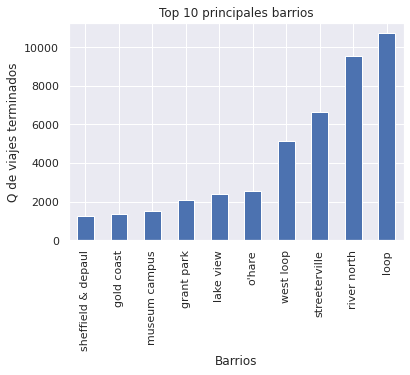

In [14]:
top=n_barr.tail(10)  #extrar los 10 principales barrios que obtuvieron mas termino de viajes y realizar grafico
top.plot(kind='bar', title='Top 10 principales barrios', ylabel='Q de viajes terminados', xlabel='Barrios')

#### Conclusión barrios
Se puede observar que 'River north' y 'Loop' son los barrios con mayores viajes terminados. Loop sobrepasando los 10.000 viajes terminados en esa localizacion y Rith north con aprox 9000 viajes terminados


## Analisis de viajes en avion

### Exploracion inicial de datos

In [15]:
wt

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [16]:
wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [17]:
wt.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [18]:
print('Cantidad de filas duplicadas = ', wt.duplicated().sum())

Cantidad de filas duplicadas =  197


Wt es un dataframe con 1068 filas y 3 columnas, dos de ella son de tipo object y la tercera es de tipo float.No existen datos nulos pero si exiten 197 filas duplicadas 

En este dataframe principalmente se observa cuando inicio el viajes, la condicion climatica y la duracion del viajes erealizado.
El maximo de duracion de un viaje es 7440 segundos o aprox 2hrs y el promedio de un viaje es 2071seg o aprox 34minutos

In [19]:
#Convertir la columna start_ts a tipo de dato datetime
wt['start_ts']=pd.to_datetime(wt['start_ts'],format='%Y-%m-%d %H:%M:%S')
wt['dia_sem']=wt['start_ts'].dt.dayofweek #Crear una nueva columna para observar que dia de la semana tiene la data

In [20]:
wt['dia_sem'].value_counts() #Observo los valores unicos, concluyo de todos los dias son sabados 

5    1068
Name: dia_sem, dtype: int64

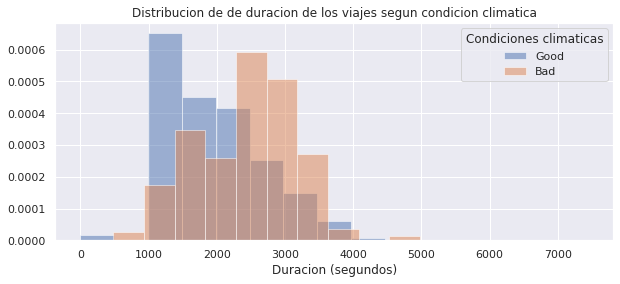

In [21]:
plt.figure(figsize=(10,4))
wt.query("weather_conditions=='Good'")['duration_seconds'].hist(label='Good', ax=plt.gca(), density=True, alpha=0.5,bins=15)
wt.query("weather_conditions=='Bad'")['duration_seconds'].hist(label='Bad', ax=plt.gca(), density=True, alpha=0.5,bins=10)
plt.xlabel('Duracion (segundos)')
plt.title('Distribucion de de duracion de los viajes segun condicion climatica')
plt.legend(title='Condiciones climaticas')
plt.show()

### Conclusion
La distribucion de duracion de los viajes es ligeramente superior cuando las condiciones climaticas son malas 

### Prueba de hipotesis

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".


Prueba de igualdad de las medias de dos poblaciones

Hipotesis nula (H0) plantea que los promedios de los viajes son iguales para ambas condiciones (mala y buena) 


Hipotesis alternativa (H1) plantea que los promedios son distintos segun las conciones climaticas (mala o buena)

In [22]:
good= wt.query("weather_conditions=='Good'")['duration_seconds']
bad = wt.query("weather_conditions=='Bad'")['duration_seconds']

In [23]:
var_good = np.var(good)
var_bad = np.var(bad)
print(var_good)
print(var_bad)

575732.9308497686
517403.56330246915


In [24]:
alpha = 0.05
pruebat = st.levene(good, bad, center='mean')
print('valor p:', pruebat.pvalue)

if (pruebat.pvalue < alpha):
    print('Rechazo la hipotesis')
else:
    print('No puedo rechazar la hipotesis')

valor p: 0.3968505113995001
No puedo rechazar la hipotesis


Hallazgos prueba LEVENE

El valor p resultante es 0.39 por lo tanto es mayor a 0.05 y determina que las muestras tienen varianzas similares


In [25]:
pruebat = st.ttest_ind(good, bad, equal_var='True')
print('valor p:', pruebat.pvalue)

if (pruebat.pvalue < alpha):
    print('Rechazo la hipotesis')
else:
    print('No puedo rechazar la hipotesis')

valor p: 6.517970327099473e-12
Rechazo la hipotesis


Hallazgos prueba t student

la hipotesis nula (H0) plantea que los promedios de los viajes son iguales para ambas condiciones, la cual se rechaza y se concluye que los promedios de los viajes son distintos para ambas condiciones climaticas.


En el analisis de viajes en taxis la empresa que sobresalio respecto a sus cantidad de viajes fue 'Flash cab' con 20.000 viajes aproximadamente y los barrios con mayor demanda como destinos son 'river north' y 'loop'. Para este analisis los nombres de las compañias y los barrios se transformaron a minusculas para facilitar la busqueda especifica. Para realizar el top 10 de compañias que mas viajes realizaron se agrupo por compañia, se sumaron los viajes para cada una de ellas y se ordeno de forma ascendente. Para realizat el top 10 de barrios, se agrupo por barrio, se sumo el promedio de viajes por barrio y se ordeno de manera ascendente

En el ultimo analisis, se realizo a los viajes en avion con un dataframe que describe cuando inicio el viajes, la condicion climatica y la duracion del viaje realizado.
El maximo de duracion de un viaje es 7440 segundos o aprox 2hrs y el promedio de un viaje es 2071seg o aprox 34 minutos.

Primeramente se realizo un histograma para graficar la distribucion de de duracion de los viajes segun condicion climatica, en lo cual se concluyo que cuando las condiciones son malas la duracion de los viajes son un poco mas dilatados que con buenas condiciones. 

Y finalmente se hace una prueba de hipotesis, planteando una hipotesis nula (H0) que dice que los promedios de los viajes son iguales para ambas condiciones, la cual, mediante una prueba t-student, se rechaza y se concluye que los promedios de los viajes son distintos para ambas condiciones climaticas.